# Analysis of Point Totals By Map

## For Over/Under Bets

(well, by cup, and by map)

In [1]:
import os, sys, subprocess, json, time
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xkcd_colors = sns.xkcd_rgb
GOLLY_GRAY = "#272B30"

## Loading Match Data

Start by loading match data from the `data/` dir:

In [3]:
def run_cmd(cmd_str):
    child = subprocess.Popen(cmd_str, shell=True, stdout=subprocess.PIPE)
    output = child.communicate()[0].decode()
    return output

print(run_cmd('ls ../data/'))

clone.sh
gollyx-dragon-data
gollyx-hellmouth-data
gollyx-klein-data
gollyx-pseudo-data
gollyx-rainbow-data
gollyx-star-data
gollyx-toroidal-data



## Method to load regular season data

user specifies the cup and the season.

In [4]:
def fetch_season_data(cup, which_season0):
    cup = cup.lower()
    seas_file = os.path.join('..', 'data', f'gollyx-{cup}-data', f'season{which_season0}', 'season.json')
    if not os.path.exists(seas_file):
        raise Exception(f"Error: season {which_season0} not valid: {seas_file} does not exist")
    with open(seas_file, 'r') as f:
        season0_seas = json.load(f)
    return season0_seas

In [5]:
def fetch_postseason_data(cup, which_season0):
    cup = cup.lower()
    post_file = os.path.join('..', 'data', f'gollyx-{cup}-data', f'season{which_season0}', 'postseason.json')
    if not os.path.exists(post_file):
        raise Exception(f"Error: season {which_season0} not valid: {post_file} does not exist")
    with open(post_file, 'r') as f:
        season0_post = json.load(f)
    return season0_post

## Test drive

We use the methods above to extract point totals and splits for each game, and collate it by map.

In [6]:
season0 = 3
sdat = fetch_season_data('klein', season0)
pdat = fetch_postseason_data('klein', season0)

print(len(sdat))

11


In [7]:
# # Print a sample game
# pprint(sdat[0][0])

# Get info about the map
# print(sdat[0][0]['map'].keys())
print(sdat[0][0]['map']['mapName'])

# Get the point total
print(sdat[0][0]['team1Score'] + sdat[0][0]['team2Score'])

# Get the differential
print(abs(sdat[0][0]['team1Score'] - sdat[0][0]['team2Score']))

East Hellmouth's Revenge
528
398


## Method to assemble point totals by map name

Compile methods to extract and compile point totals, given either a season and a postseason data structure.

Then iterate over each season number, request the data, and compile the map point totals.

In [8]:
def _handle_it(_game, _totals, _diffs):
    map_name = _game['map']['mapName']
    total = _game['team1Score'] + _game['team2Score']
    diff = abs(_game['team1Score'] - _game['team2Score'])

    if map_name not in _totals:
        _totals[map_name] = []
    if map_name not in _diffs:
        _diffs[map_name] = []

    _totals[map_name].append(total)
    _diffs[map_name].append(diff)

In [9]:
def compile_totals_diffs_by_map(season_dat, postseason_dat, totals={}, diffs={}):

    # Season first
    for day in season_dat:
        for game in day:
            _handle_it(game, totals, diffs)

    # Postseason second
    for series in postseason_dat:
        miniseason = postseason_dat[series]
        for day in miniseason:
            for game in day:
                _handle_it(game, totals, diffs)
    
    return totals, diffs

### Try it out on a single season

Here is what the above method returns when run on a single season:

In [10]:
season0 = 0
sdat = fetch_season_data('klein', season0)
pdat = fetch_postseason_data('klein', season0)
totals, diffs = compile_totals_diffs_by_map(sdat, pdat)
pprint(totals)

{'Because Math': [626, 589, 616, 586, 558, 665, 554, 637, 679],
 'Carcinization': [511, 432, 224, 240, 554],
 'Charlie Foxtrot': [278, 300, 576, 352, 437, 495, 567],
 'Crash and Burn': [248, 189, 604, 501, 532, 247, 484, 338, 267, 206, 335],
 'Donut Hot Tub': [596, 571, 601, 577, 589],
 'Double Rainbow': [558, 517, 656, 539, 372],
 'East Hellmouth': [614, 660, 517],
 "East Hellmouth's Revenge": [545, 589, 517, 653, 622],
 'Engine Room': [452, 564, 584, 587, 437],
 'Fistfight at the Opera': [551, 543],
 'Justyna': [540, 452, 216, 613, 353],
 'Morning Commute': [560, 366, 491, 579, 613, 548, 513, 477],
 'Parking Garage': [468, 302, 374],
 'Rabbit Farm': [479, 481, 589, 623, 551],
 'Spacetime Complex': [282, 273, 277, 562, 491, 422, 277],
 'Spider Cave': [525],
 'Sunbeam Moondog': [303, 328, 341, 251, 535, 570],
 'The Orchard': [594, 538, 632, 574, 593, 451, 471, 526],
 'The Quad': [516, 294, 284, 461, 536, 596],
 'The Zoo': [465, 402, 334, 636, 364, 289, 677, 515, 556],
 'Underground Cav

### Try it out on multiple seasons

If we don't pass in a totals/diffs counter dictionary, then the method will automatically create an empty dictionary to start with, and manage that for us.

But we can also pass in our own totals/diffs counter dictionary, one that is accumulating totals from across multiple seasons.

In [11]:
totals = {}
diffs = {}
for season0 in range(0, 23):
    sdat = fetch_season_data('klein', season0)
    pdat = fetch_postseason_data('klein', season0)
    compile_totals_diffs_by_map(sdat, pdat, totals, diffs)
print(totals['West Hellmouth'])

[275, 246, 353, 212, 199, 164, 188, 144, 214, 95, 221, 460, 257, 333, 180, 228, 247, 547, 262, 271, 517, 199, 242, 349, 318, 291, 228, 89, 230, 227, 272, 147, 544, 431, 505, 339, 434, 313, 167, 357, 389, 380, 169, 425, 173, 393, 230, 552, 250, 245, 191, 101, 449, 430, 349, 139, 179, 478, 251, 629, 230, 191, 200, 410, 245, 412, 410, 370, 179, 248, 358, 179, 228, 272, 209, 332, 264, 220, 470, 392, 346, 282, 388, 384, 244, 481, 283, 579, 229, 219, 196, 454, 434, 129, 406, 195, 154, 238, 554, 327, 368, 516, 231, 227, 175, 242, 369, 296, 129, 505, 553, 218, 318, 540, 408, 195, 233, 120, 229, 257, 264, 442, 221, 233, 290, 285, 265, 447, 452, 365, 355, 308, 537, 268, 407, 236, 208, 346, 320, 311, 249, 342]


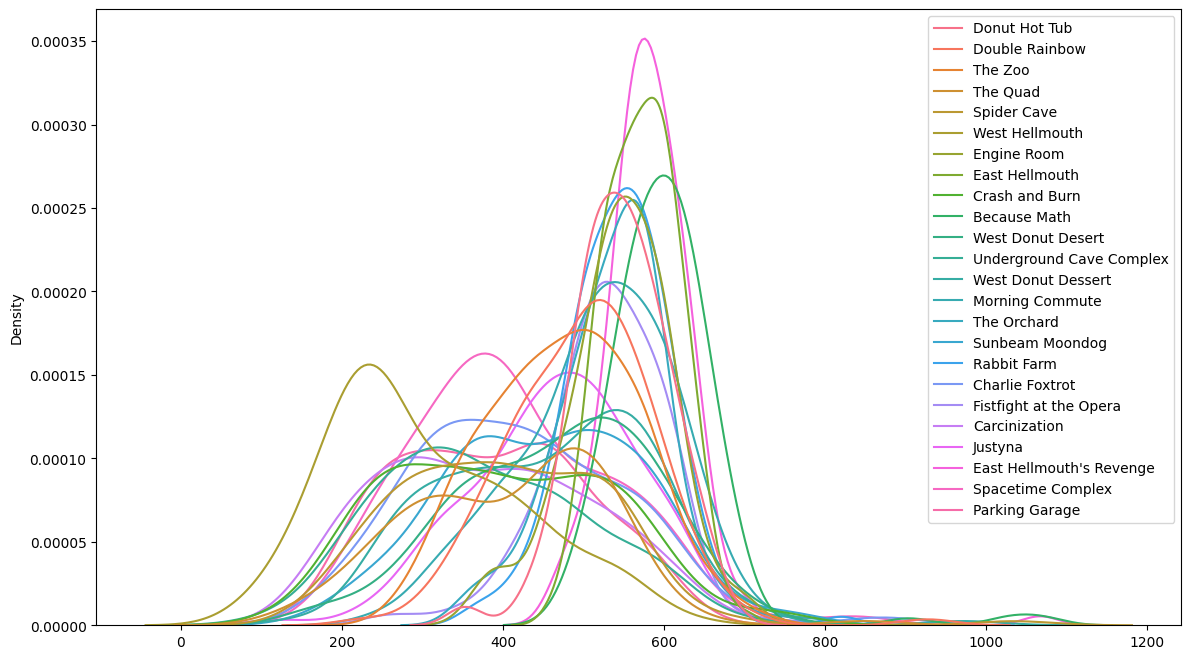

In [12]:
# This histogram plot is cool but has too much information to easily interpret...
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

sns.kdeplot(data=totals, ax=ax)

plt.show()

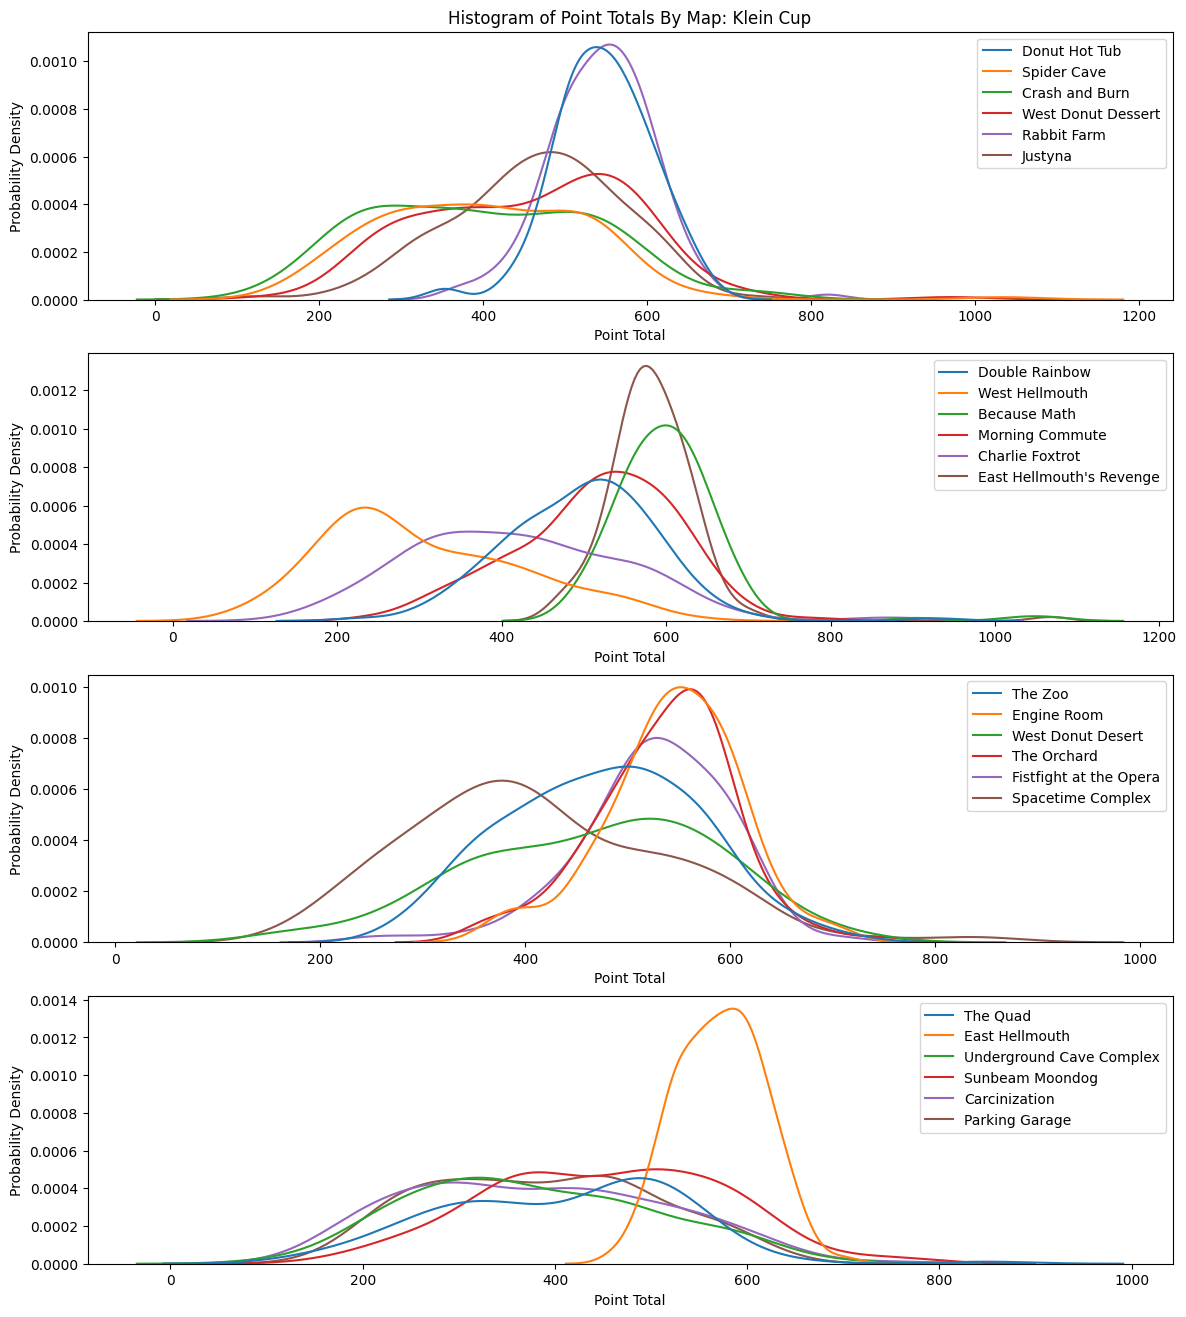

In [13]:
fig, axes = plt.subplots(4, 1, figsize=(14, 16))

# This bit of magic will iterate over all the keys in totals, and split into 4 groups
for m, aax_ in enumerate(axes):
    sns.kdeplot(data={k: v for i, (k, v) in enumerate(totals.items()) if i%4==m}, ax=aax_)
    aax_.set_xlabel("Point Total")
    aax_.set_ylabel("Probability Density")

axes[0].set_title("Histogram of Point Totals By Map: Klein Cup")
plt.show()

## Toroidal Cup

In [14]:
tor_totals = {}
tor_diffs = {}
for season0 in range(0, 23):
    sdat = fetch_season_data('toroidal', season0)
    pdat = fetch_postseason_data('toroidal', season0)
    compile_totals_diffs_by_map(sdat, pdat, tor_totals, tor_diffs)

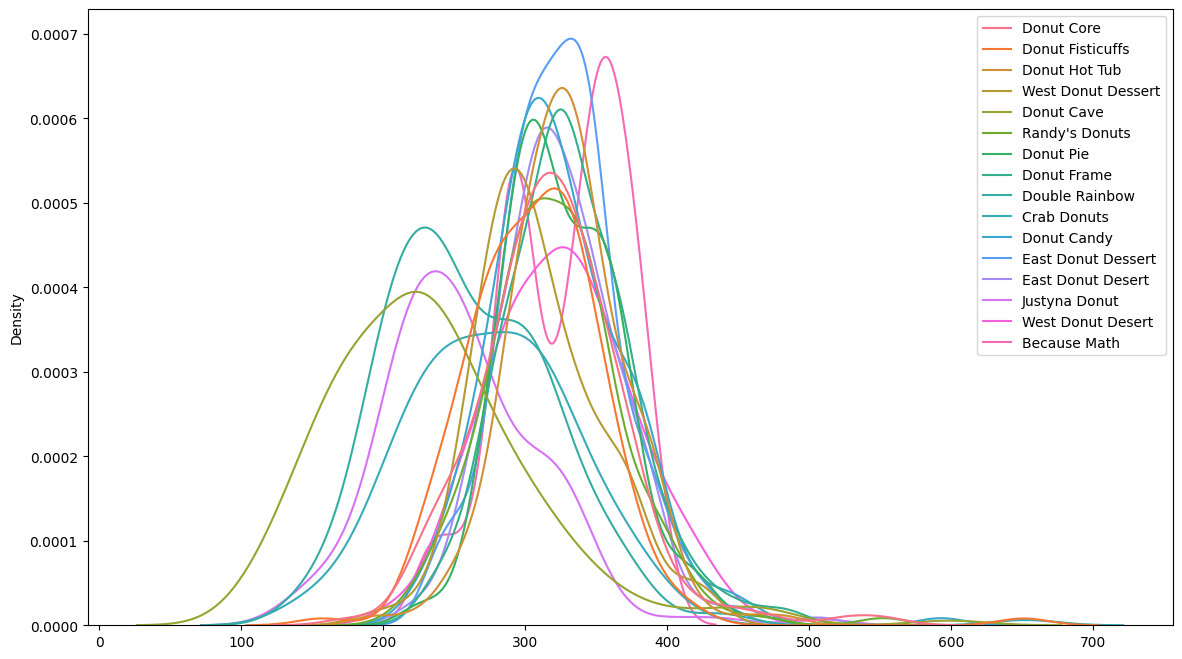

In [15]:
# This histogram plot is cool but has too much information to easily interpret...
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

sns.kdeplot(data=tor_totals, ax=ax)

plt.show()

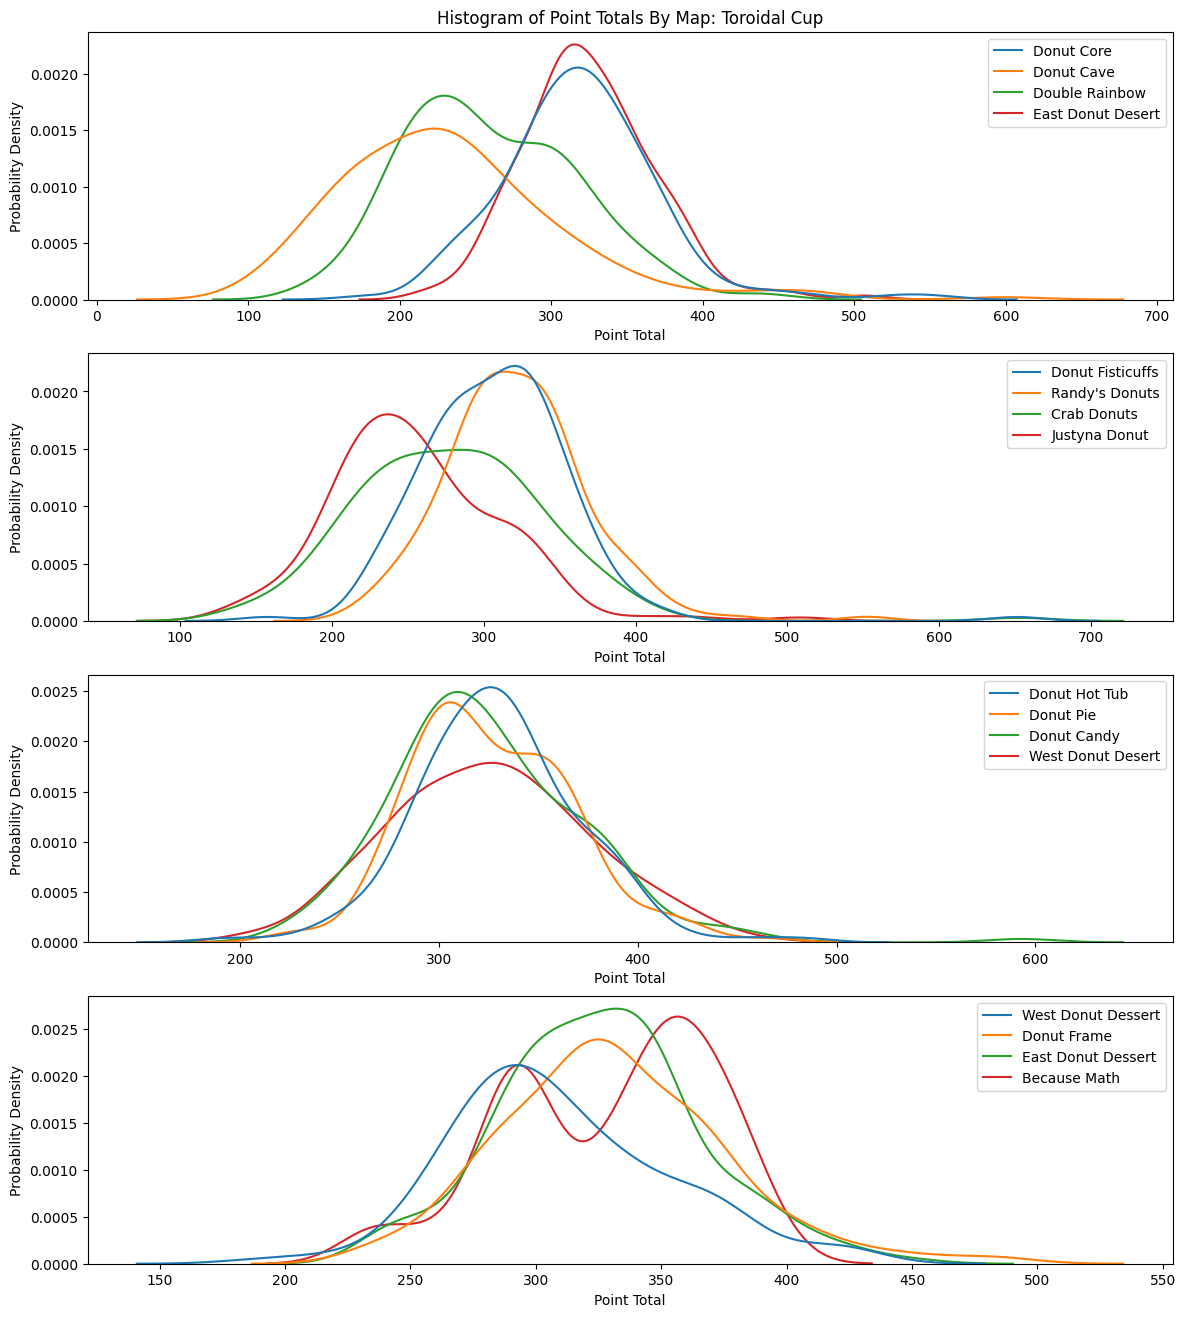

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(14, 16))

# This bit of magic will iterate over all the keys in totals, and split into 4 groups
for m, aax_ in enumerate(axes):
    sns.kdeplot(data={k: v for i, (k, v) in enumerate(tor_totals.items()) if i%4==m}, ax=aax_)
    aax_.set_xlabel("Point Total")
    aax_.set_ylabel("Probability Density")

axes[0].set_title("Histogram of Point Totals By Map: Toroidal Cup")
plt.show()

## Star Cup

In [17]:
star_totals = {}
star_diffs = {}
for season0 in range(0, 23):
    sdat = fetch_season_data('star', season0)
    pdat = fetch_postseason_data('star', season0)
    compile_totals_diffs_by_map(sdat, pdat, star_totals, star_diffs)

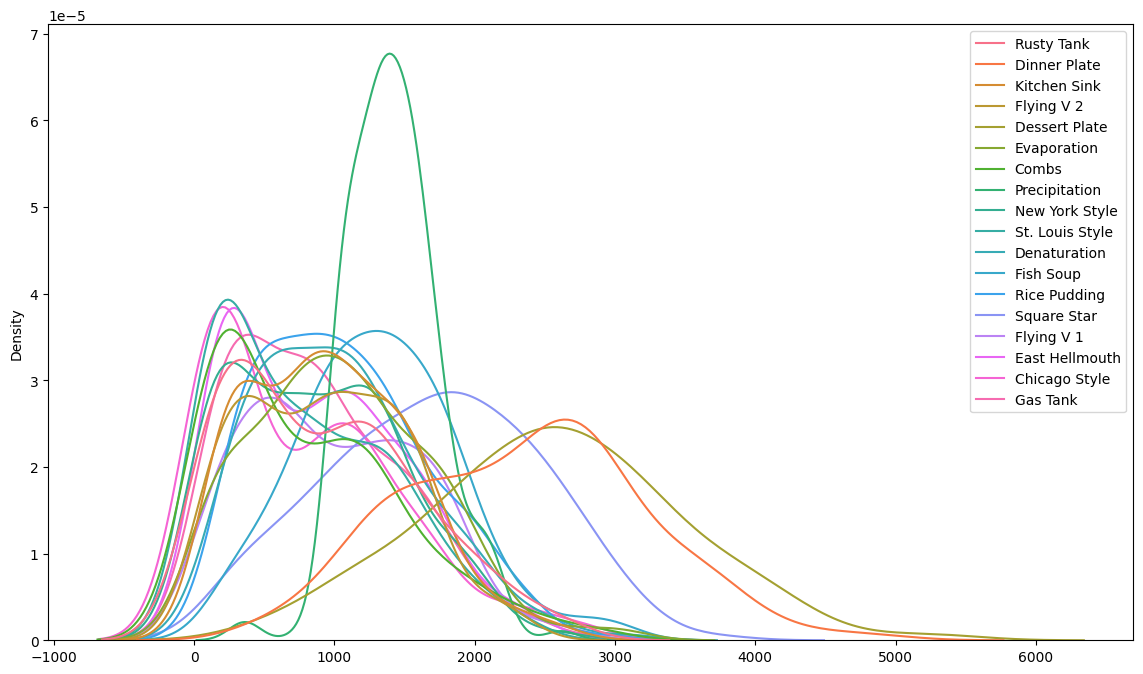

In [18]:
# This histogram plot is cool but has too much information to easily interpret...
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

sns.kdeplot(data=star_totals, ax=ax)

plt.show()

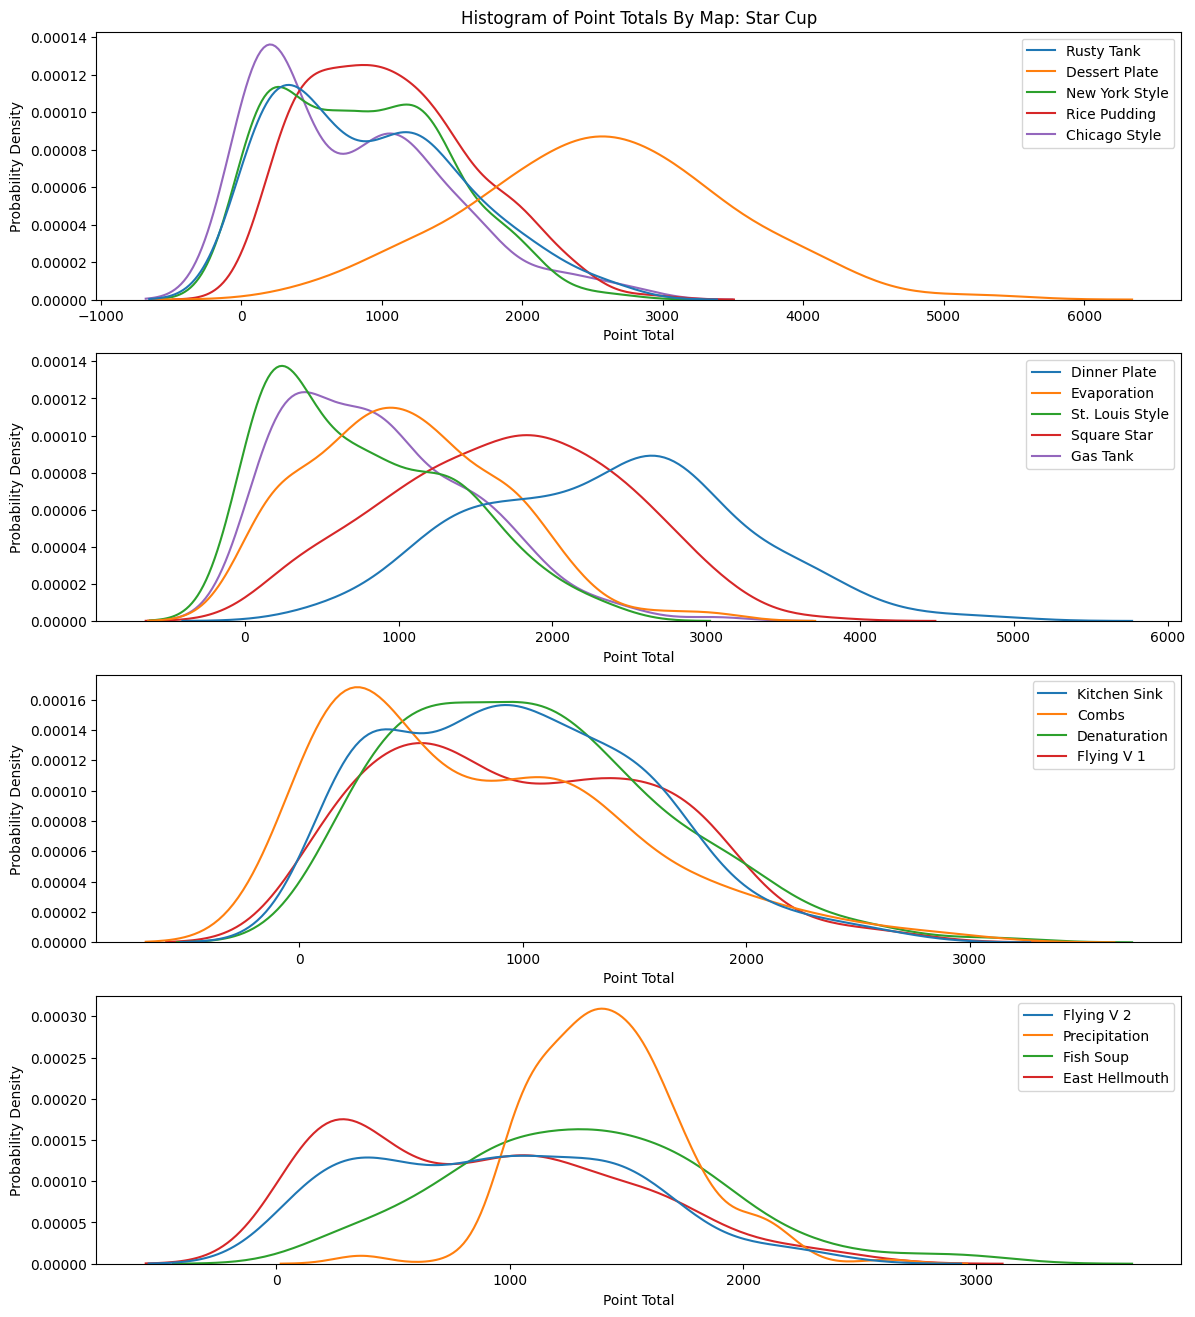

In [19]:
fig, axes = plt.subplots(4, 1, figsize=(14, 16))

# This bit of magic will iterate over all the keys in totals, and split into 4 groups
for m, aax_ in enumerate(axes):
    sns.kdeplot(data={k: v for i, (k, v) in enumerate(star_totals.items()) if i%4==m}, ax=aax_)
    aax_.set_xlabel("Point Total")
    aax_.set_ylabel("Probability Density")

axes[0].set_title("Histogram of Point Totals By Map: Star Cup")
plt.show()

## Empirical CDF For Determining Split

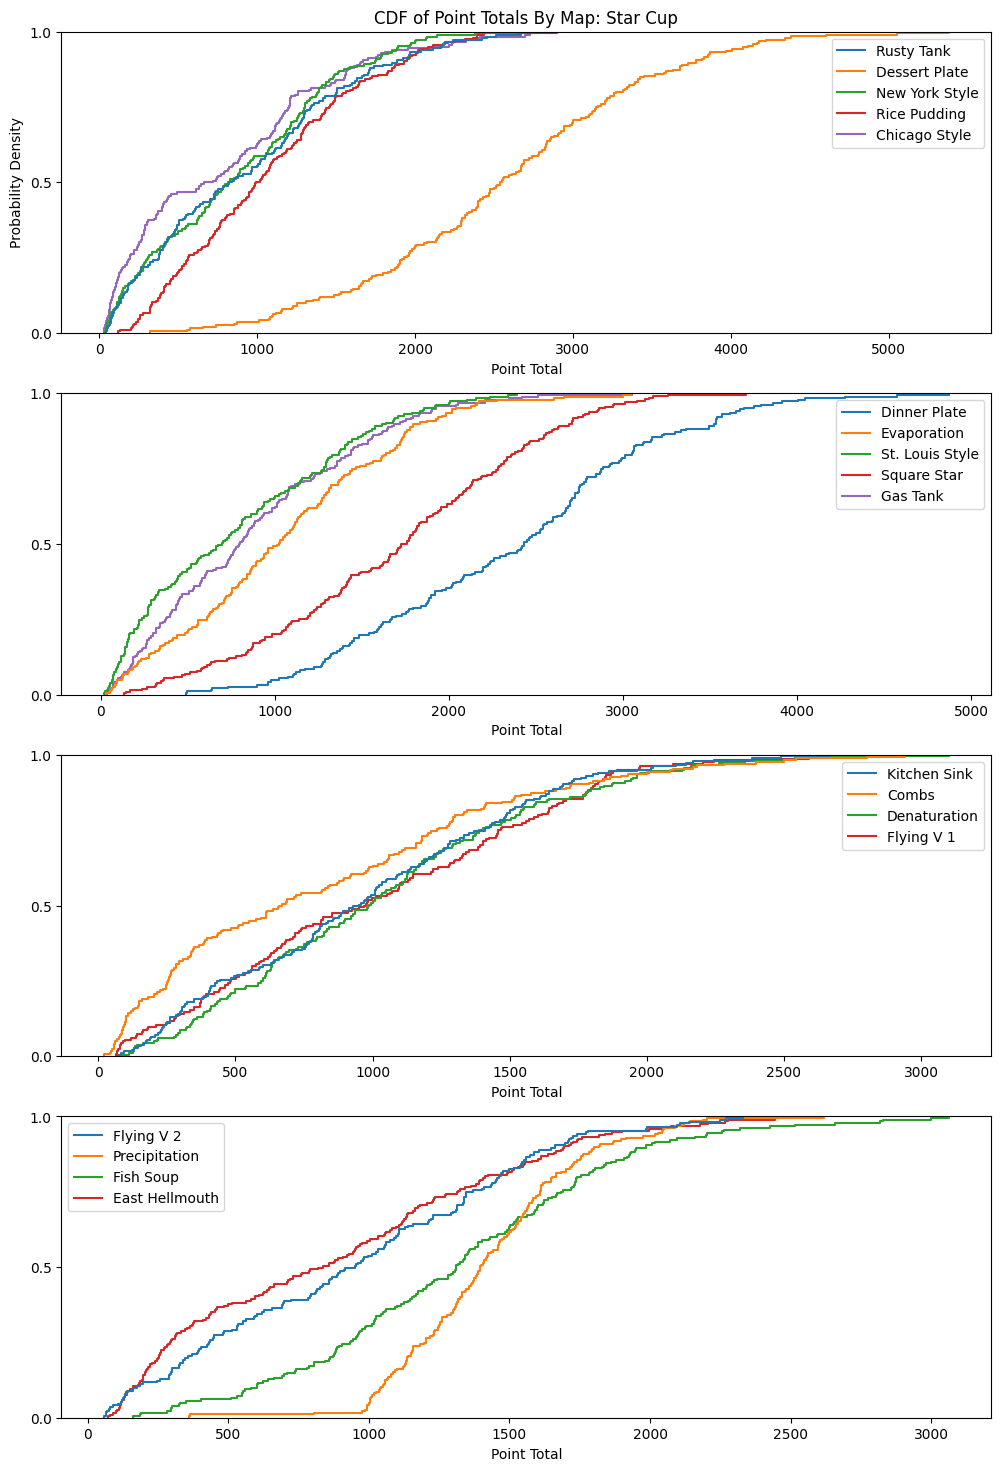

In [20]:
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

# This bit of magic will iterate over all the keys in totals, and split into 4 groups
for m, aax_ in enumerate(axes):
    sns.ecdfplot(data={k: v for i, (k, v) in enumerate(star_totals.items()) if i%4==m}, ax=aax_)
    aax_.set_ylabel("")
    aax_.set_yticks([0.0, 0.5, 1.0])
    aax_.set_xlabel("Point Total")
    # aax_.set_facecolor(GOLLY_GRAY)

axes[0].set_ylabel("Probability Density")
axes[0].set_title("CDF of Point Totals By Map: Star Cup")

plt.show()

## Empirical CDF Function, Quantile Function

We can use the statsmodels package to construct an empirical CDF function that can be evaluated at specific x locations (number of points), and will return the cumulative probability of that number of points (i.e., probability that the point total will be less than or equal to that value).

In [26]:
import numpy as np
import scipy
from statsmodels.distributions.empirical_distribution import ECDF

n = 100
x = np.linspace(0,3000,n)
f = lambda x,mu,sigma: scipy.stats.norm(mu,sigma).cdf(x)

ecdf = ECDF(star_totals['Fish Soup'])
data = ecdf(x[:7])

Alternatively, if all we're really interested in is the x value of the empirical CDF at y = 0.50, we can get that more easily using the quantile function:

In [27]:
np.quantile(star_totals['Fish Soup'], q=0.50)

1310.0

In [28]:
np.quantile(star_totals['Precipitation'], q=0.50)

1395.0

In [29]:
np.quantile(star_totals['Dessert Plate'], q=0.50)

2539.0

In [30]:
np.quantile(star_totals['East Hellmouth'], q=0.50)

836.0